# Introduction to jupyter lab and python

In [9]:
import numpy as np
import sympy as sp

I like to have a console open as I am working in notebooks. So I can do quick queries and rapidly debug stuff.

In [2]:
%qtconsole

Let's define two matrices

In [9]:
matrix1 = np.array([[1, 0],
                    [0, 1]])

matrix2 = np.array([[1, 2], 
                    [1, 1]])

In [10]:
np.array(matrix1) @ np.array(matrix2)

array([[1, 2],
       [1, 1]])

## Lets define a 2D rotation matrix

In [11]:
def rotate(theta):
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]])

In [13]:
rotate(np.pi/8)

array([[ 0.92387953, -0.38268343],
       [ 0.38268343,  0.92387953]])

In [14]:
rotate(np.pi/8) @ matrix2

array([[0.5411961 , 1.46507563],
       [1.30656296, 1.6892464 ]])

## Using straight * can cause problems!!! Does element-wise multiplication not matrix multiplication

In [15]:
rotate(0) * matrix2

array([[ 1., -0.],
       [ 0.,  1.]])

In [16]:
rotate(0) @ matrix2

array([[1., 2.],
       [1., 1.]])

In [13]:
import matplotlib as mpl
# mpl.use('Qt5Agg')
import matplotlib.pyplot as plt
# plt.ion()

In [20]:
vec1 = np.array([[1,0]]).T
vec1

array([[1],
       [0]])

plots (1,0) and (1,2)

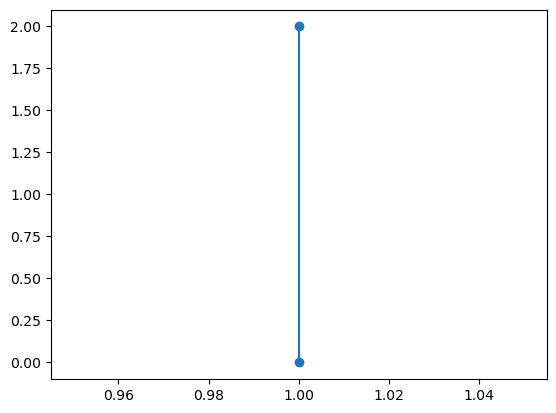

In [28]:
plt.plot([1,1],[0,2],'o-')

(-1.0, 1.0, -1.0, 1.0)

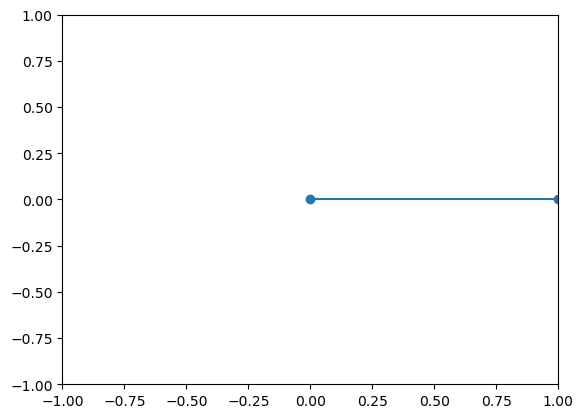

In [13]:
plt.plot([0, vec1[0,0]], [0, vec1[1,0]], 'o-')
plt.axis([-1, 1, -1, 1])

## Switch to plotting in an external window

In [14]:
%matplotlib qt

In [15]:
plt.plot([0, vec1[0,0]], [0, vec1[1,0]], 'o-')
plt.axis([-1, 1, -1, 1])

(-1.0, 1.0, -1.0, 1.0)

## Switch to plotting in the document (this is necessary for turning in your assignments)

In [21]:
%matplotlib inline
plt.ion() # turns interactive plotting on so plots display right after code execution

(-1.0, 1.0, -1.0, 1.0)

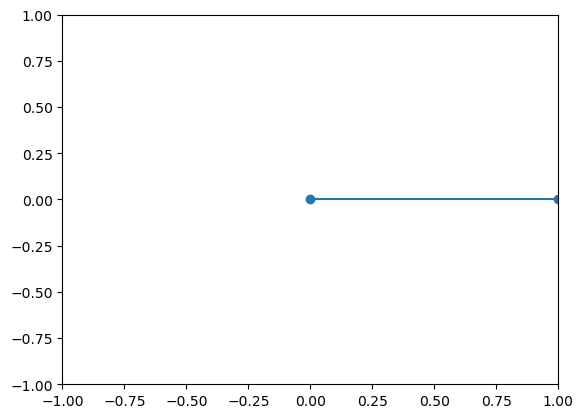

In [22]:
plt.plot([0, vec1[0,0]], [0, vec1[1,0]], 'o-')
plt.axis([-1, 1, -1, 1])


## Switch back to qt so we can make some animations

In [66]:
%matplotlib qt

In [24]:
newvec = rotate(np.pi/8) @ vec1

plt.plot([0, newvec[0,0]], [0, newvec[1,0]], 'o-')
plt.axis([-1, 1, -1, 1])

(-1.0, 1.0, -1.0, 1.0)

In [25]:
angles = np.linspace(0, 2*np.pi, 100)
for ang in angles:
    
    newvec = rotate(ang) @ vec1

    plt.clf()    
    plt.plot([0, newvec[0,0]], [0, newvec[1,0]], 'o-')
    plt.axis([-1, 1, -1, 1])
#     plt.draw()
    plt.pause(0.01)
    
    
    

## How to plot many points (when represented as column vectors)

In [35]:
%matplotlib inline
plt.ion()
plt.show()

In [36]:
points = np.array([[1, 2, 3, 4],
                   [0, 5, 8, -9]])
points                

array([[ 1,  2,  3,  4],
       [ 0,  5,  8, -9]])

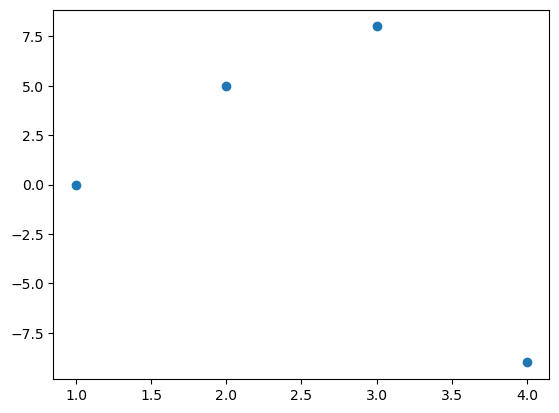

In [41]:
plt.plot(points[0,:], points[1,:], 'o')

In [42]:
pts_dict = {'x': points[0,:], 'y': points[1,:]}

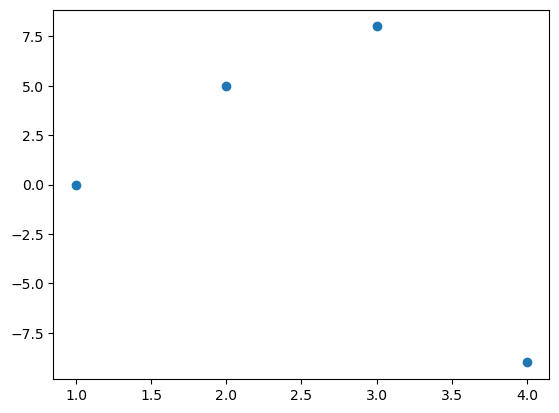

In [43]:
plt.plot(pts_dict['x'], pts_dict['y'],'o')

## Plot a coordinate system and then move it around

In [10]:
origin = np.eye(3)
origin

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [11]:
new_coord_sys = np.array([[0.7115,    0.4325,   -0.5538],
                          [0.6388,   -0.7264,    0.2535],
                          [-0.2927,   -0.5341,   -0.7931]])

(-0.16666666666666674,
 1.1666666666666667,
 -0.16666666666666674,
 1.1666666666666667)

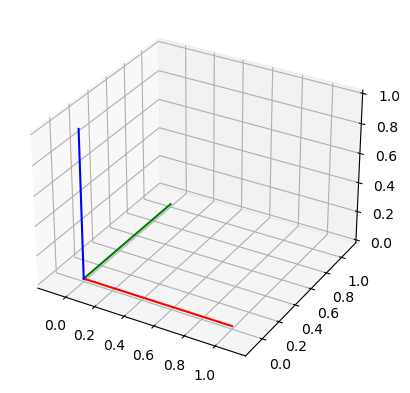

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d', adjustable='box')

def plot_frame(R, ax):
    ax.plot([0, R[0,0]], [0, R[1,0]], [0, R[2,0]], 'r')
    ax.plot([0, R[0,1]], [0, R[1,1]], [0, R[2,1]], 'g')
    ax.plot([0, R[0,2]], [0, R[1,2]], [0, R[2,2]], 'b')

plot_frame(origin, ax)
ax.axis('equal')

In [78]:
plot_frame(new_coord_sys, ax)

In [79]:
np.linalg.det(new_coord_sys)

0.9999556465280001

In [80]:
np.dot(new_coord_sys[:,0], new_coord_sys[:,1])

3.0499999999986474e-05

In [81]:
new_coord_sys[:,0].T @ new_coord_sys[:,1]

3.0499999999986474e-05

Again use @ for vector and matrix multiplication

In [82]:
new_coord_sys[:,0].T * new_coord_sys[:,1]

array([ 0.30772375, -0.46402432,  0.15633107])

## Introduction to Sympy tools

In [1]:
import sympy
from sympy import simplify, Function
from sympy import symbols, pprint
from sympy import sin, cos, asin, acos, pi
from sympy import Matrix, diff


### Generate sympy variables

In [2]:
# We wrap in parentheses here so we can write it on multiple lines. Similar
# with the triple quotes on the string. Usually we don't need to use these things.
(t, 
 alpha, 
 gamma, 
 beta) = symbols("""t, 
                    alpha(t),
                    gamma(t),
                    beta(t)""" , real = True)

theta = Function('theta', real=True)(t)
alpha = Function('alpha', real=True)(t)

## Define a rotation matrix about Z

In [3]:
def R_z(theta):
    """
    Function to return an arbitrary transformation matrix 
    This is for sympy symbolic calculation
    """
    return Matrix([[cos(theta), -sin(theta), 0], 
                   [sin(theta), cos(theta), 0],
                   [0, 0, 1]])

In [4]:
R_z(alpha)

Matrix([
[cos(alpha(t)), -sin(alpha(t)), 0],
[sin(alpha(t)),  cos(alpha(t)), 0],
[            0,              0, 1]])

In [5]:
diff(R_z(alpha), t)

Matrix([
[-sin(alpha(t))*Derivative(alpha(t), t), -cos(alpha(t))*Derivative(alpha(t), t), 0],
[ cos(alpha(t))*Derivative(alpha(t), t), -sin(alpha(t))*Derivative(alpha(t), t), 0],
[                                     0,                                      0, 0]])

Verify that $$\dot{R}R^T = [\omega]_\times$$

In [6]:
simplify(diff(R_z(alpha), t) @ R_z(alpha).T)

Matrix([
[                      0, -Derivative(alpha(t), t), 0],
[Derivative(alpha(t), t),                        0, 0],
[                      0,                        0, 0]])